In [124]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [125]:
dbname = 'naxml_34.db'
dbpath = '../data/'
db_string = f'{dbpath}{dbname}'


In [126]:
load_csv = False

In [127]:
if load_csv == True:
    df = pd.read_csv('../data/salestransbig.csv')


In [128]:
if load_csv == False:
    cnx = sq.connect(db_string)
    df = pd.read_sql_query("SELECT Filename, SalesQuantity, Description, POSCode, MerchandiseCode FROM TransactionLine_Products", cnx)
    df = df.rename(columns={"Filename":"transaction_id", "SalesQuantity":"salesquantity", "Description":"itemdesc","POSCode":"plu","MerchandiseCode":"category"})

In [129]:
df.head(10)

,transaction_id,salesquantity,itemdesc,plu,category
0,PJR340170217063417731081.xml,1.0,300 MILLION GLDEN TICKET,649148000987,27
1,PJR340170217122859731871.xml,-1.0,Ultimate Wash,9999,88888
2,PJR340170217133453732046.xml,1.0,50X THE CASH LOTTERY EAC,649148001373,27
3,PJR340170217134815732082.xml,1.0,MONSTER REHAB TEA LMNDE,070847003229,7
4,PJR340170217134815732082.xml,1.0,MOUNTAIN DEW 20Z BTL 20,012000001314,7
5,PJR340170217134815732082.xml,5.0,5X THE CASH LOTTERY EACH,649148001403,27
6,PJR340170217141123732138.xml,1.0,50X THE CASH LOTTERY EAC,649148001373,27
7,PJR340170217142059732169.xml,1.0,DIAMOND DOLLARS $5 EACH,649148001229,27
8,PJR340170217142059732169.xml,1.0,DIAMOND DOLLARS $5 EACH,649148001229,27
9,PJR340170217142059732169.xml,1.0,DIAMOND DOLLARS $5 EACH,649148001229,27


In [130]:
df_codes = pd.read_csv('../data/codes.csv')
df_codes['MerchandiseCode'] = df_codes['MerchandiseCode'].astype(str)
df_codes = df_codes.rename(columns={"MerchandiseCode":"category","MerchandiseCodeDescription":"category_name"}) 
df = df.merge(df_codes, on='category', how='inner')

In [131]:
df_codes.head()

,category,category_name
0,2,Cigarettes
1,3,Other Tobacco
2,4,Beer
3,6,Liquor
4,7,Soda and Juice


In [132]:
df.head()

,transaction_id,salesquantity,itemdesc,plu,category,category_name
0,PJR340170217063417731081.xml,1.0,300 MILLION GLDEN TICKET,649148000987,27,Scratch Off Tickets
1,PJR340170217133453732046.xml,1.0,50X THE CASH LOTTERY EAC,649148001373,27,Scratch Off Tickets
2,PJR340170217134815732082.xml,5.0,5X THE CASH LOTTERY EACH,649148001403,27,Scratch Off Tickets
3,PJR340170217141123732138.xml,1.0,50X THE CASH LOTTERY EAC,649148001373,27,Scratch Off Tickets
4,PJR340170217142059732169.xml,1.0,DIAMOND DOLLARS $5 EACH,649148001229,27,Scratch Off Tickets


In [133]:
df.set_index('transaction_id',inplace=True)
#df = df[df.groupby('transaction_id')['category'].count() > 1]
#df.head()

In [252]:
cat_count  = df['category_name'].value_counts() / len(df['category_name'])
cat_count = cat_count[:15,]

In [253]:
#plt.figure(figsize=(15,5))
#sns.barplot(cat_count.index, cat_count.values, alpha=0.8)
#plt.title('Top 15 categories')
#plt.ylabel('% of Transactions', fontsize=12)
#plt.xlabel('category_name', fontsize=12)
#plt.xticks(rotation=45)
#plt.show()

In [254]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=cat_count.index, values=cat_count.values)])
fig.update_layout(title='Categories by % of Sales')
fig.show()

In [255]:
labels = cat_count.index 
values = cat_count.values
parents = ["category" for i in labels]

fig = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents))

fig.update_layout(title='Categories by % of Sales')
fig.show()

In [256]:
fig = go.Figure([go.Bar(x=cat_count.index, y=cat_count.values)])
fig.update_layout(title='Categories by % of Sales (Support)')
fig.show()

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


In [258]:
basket = (df.groupby(['transaction_id', 'category_name'])['salesquantity'].sum().unstack().reset_index().fillna(0)
          .set_index('transaction_id'))

In [259]:
basket.head()

category_name,Beer,Candy,Car Wash,Cigarettes,Coffee,Deli,Fountain,Fuel 1,Grocery High Tax,Liquor,Lottery Winners,Lotto,Lotto Winners,Novelty,Oil,Other Tobacco,Scratch Off Tickets,Snacks and Grocery,Soda and Juice,Tobacco Excise Tax
transaction_id,,,,,,,,,,,,,,,,,,,,
PJR340170101060446643182.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PJR340170101060552643186.xml,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PJR340170101062223643195.xml,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PJR340170101062502643196.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
PJR340170101062541643197.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [260]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 0:
        return 1

In [261]:
basket_sets = basket.applymap(encode_units)
#basket_sets = basket_sets[basket_sets['Malt Liquor'] > 0]
basket_sets.head()

category_name,Beer,Candy,Car Wash,Cigarettes,Coffee,Deli,Fountain,Fuel 1,Grocery High Tax,Liquor,Lottery Winners,Lotto,Lotto Winners,Novelty,Oil,Other Tobacco,Scratch Off Tickets,Snacks and Grocery,Soda and Juice,Tobacco Excise Tax
transaction_id,,,,,,,,,,,,,,,,,,,,
PJR340170101060446643182.xml,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
PJR340170101060552643186.xml,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PJR340170101062223643195.xml,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PJR340170101062502643196.xml,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
PJR340170101062541643197.xml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [262]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.028681,(Beer)
1,0.068834,(Candy)
2,0.033324,(Car Wash)
3,0.126195,(Cigarettes)
4,0.052445,(Coffee)
5,0.127834,(Fountain)
6,0.454247,(Fuel 1)
7,0.020486,(Grocery High Tax)
8,0.018028,(Liquor)
9,0.022945,(Lottery Winners)


In [263]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Candy),(Snacks and Grocery),0.068834,0.113630,0.018847,0.273810,2.409655,0.011026,1.220575
1,(Snacks and Grocery),(Candy),0.113630,0.068834,0.018847,0.165865,2.409655,0.011026,1.116326
2,(Soda and Juice),(Candy),0.198306,0.068834,0.031685,0.159780,2.321243,0.018035,1.108241
3,(Candy),(Soda and Juice),0.068834,0.198306,0.031685,0.460317,2.321243,0.018035,1.485491
4,(Car Wash),(Fuel 1),0.033324,0.454247,0.029227,0.877049,1.930774,0.014090,4.438787
5,(Fuel 1),(Car Wash),0.454247,0.033324,0.029227,0.064342,1.930774,0.014090,1.033150
6,(Fountain),(Cigarettes),0.127834,0.126195,0.020486,0.160256,1.269911,0.004354,1.040562
7,(Cigarettes),(Fountain),0.126195,0.127834,0.020486,0.162338,1.269911,0.004354,1.041191
8,(Cigarettes),(Tobacco Excise Tax),0.126195,0.124556,0.124556,0.987013,7.924242,0.108838,67.409178
9,(Tobacco Excise Tax),(Cigarettes),0.124556,0.126195,0.124556,1.000000,7.924242,0.108838,inf


In [264]:
rules = rules[rules['confidence'] <1]
#rules.dropna(how='any')

In [265]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Candy),(Snacks and Grocery),0.068834,0.113630,0.018847,0.273810,2.409655,0.011026,1.220575
1,(Snacks and Grocery),(Candy),0.113630,0.068834,0.018847,0.165865,2.409655,0.011026,1.116326
2,(Soda and Juice),(Candy),0.198306,0.068834,0.031685,0.159780,2.321243,0.018035,1.108241
3,(Candy),(Soda and Juice),0.068834,0.198306,0.031685,0.460317,2.321243,0.018035,1.485491
4,(Car Wash),(Fuel 1),0.033324,0.454247,0.029227,0.877049,1.930774,0.014090,4.438787
5,(Fuel 1),(Car Wash),0.454247,0.033324,0.029227,0.064342,1.930774,0.014090,1.033150
6,(Fountain),(Cigarettes),0.127834,0.126195,0.020486,0.160256,1.269911,0.004354,1.040562
7,(Cigarettes),(Fountain),0.126195,0.127834,0.020486,0.162338,1.269911,0.004354,1.041191
8,(Cigarettes),(Tobacco Excise Tax),0.126195,0.124556,0.124556,0.987013,7.924242,0.108838,67.409178
10,(Snacks and Grocery),(Coffee),0.113630,0.052445,0.011745,0.103365,1.970941,0.005786,1.056791


In [266]:
print(f'Number of assocation rules {rules.shape[0]}')

Number of assocation rules 35


In [267]:
import seaborn as sns

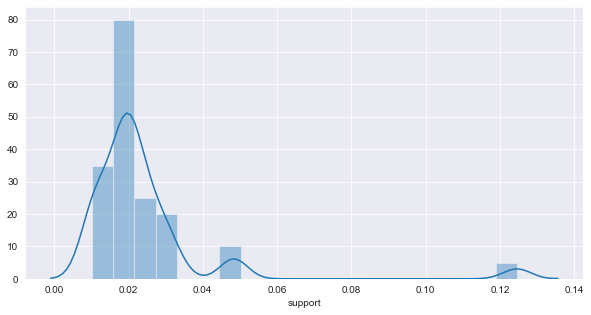

In [268]:
plt.figure(figsize=(10,5))
sns.distplot(rules.support)
plt.show()

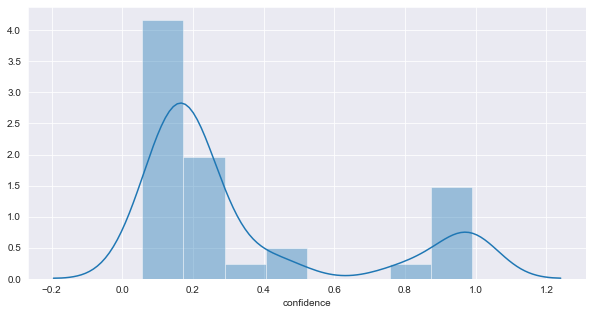

In [173]:
plt.figure(figsize=(10,5))
sns.distplot(rules.confidence)
plt.show()

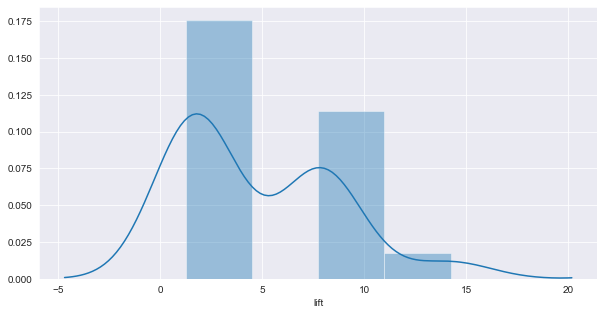

In [174]:
plt.figure(figsize=(10,5))
sns.distplot(rules.lift)
plt.show()

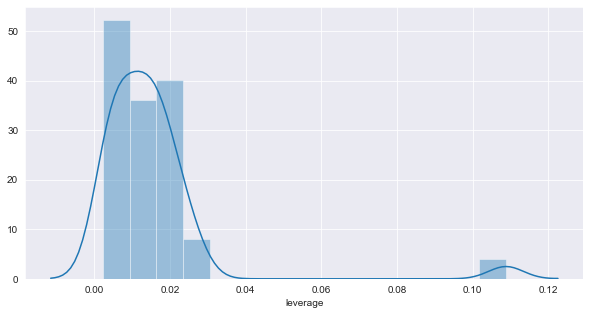

In [175]:
plt.figure(figsize=(10,5))
sns.distplot(rules.leverage)
plt.show()

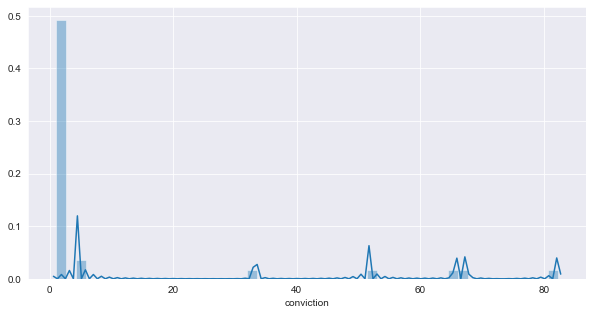

In [176]:
plt.figure(figsize=(10,5))
sns.distplot(rules.conviction)
plt.show()

<Figure size 720x360 with 0 Axes>

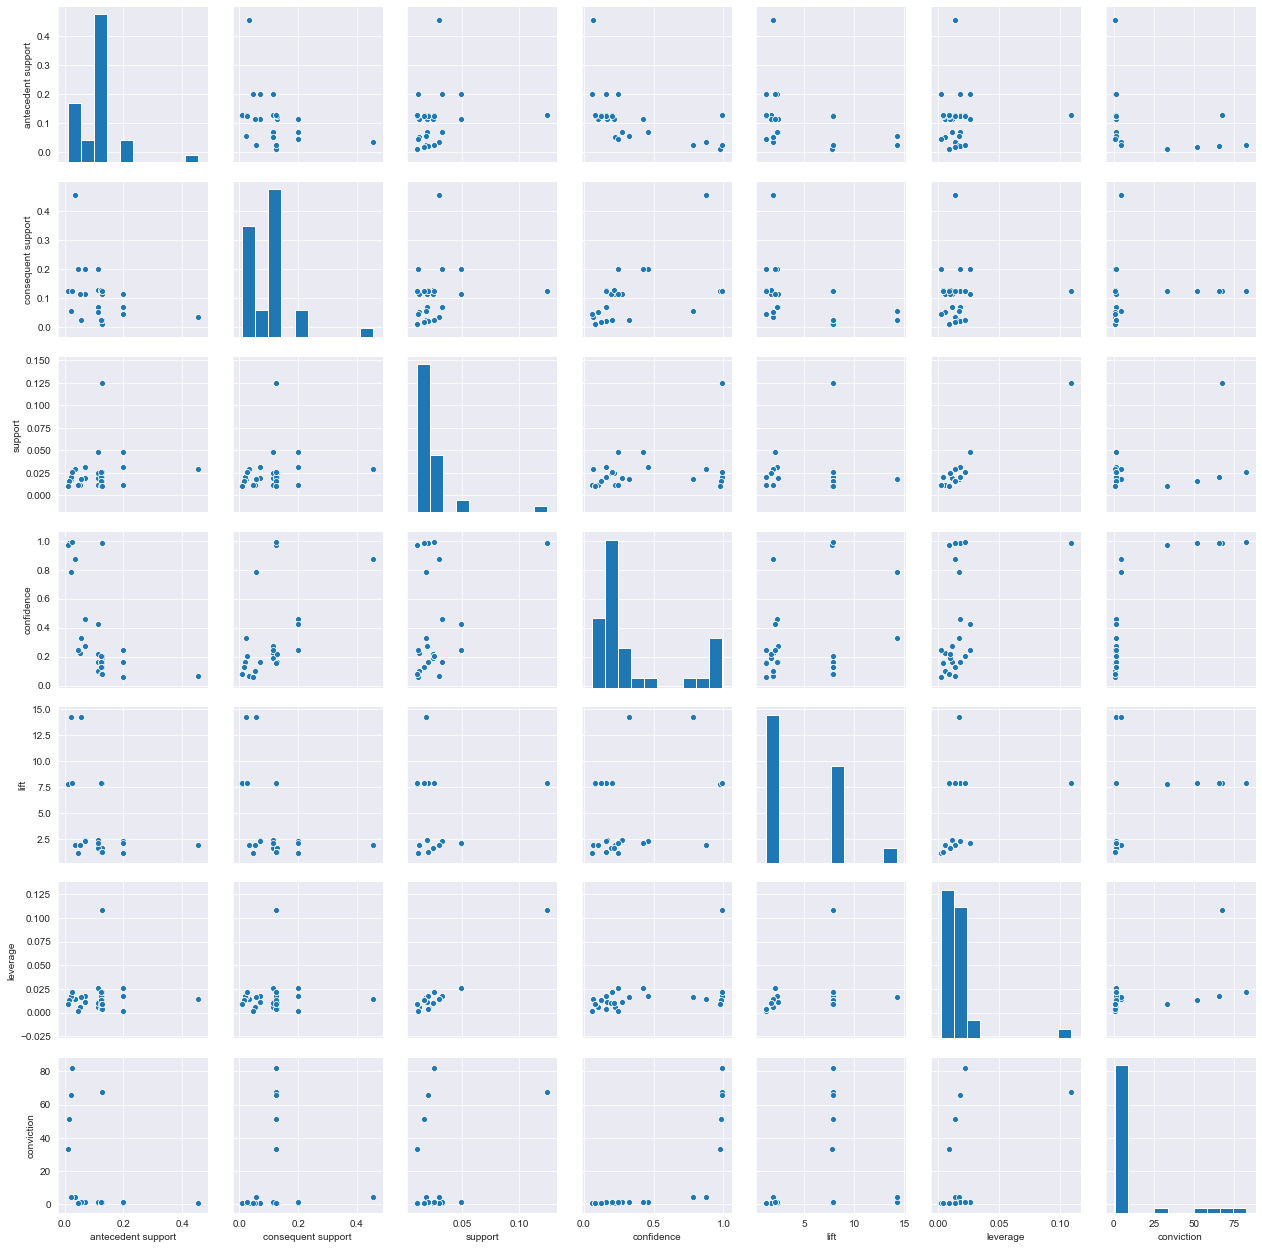

In [177]:
plt.figure(figsize=(10,5))
sns.pairplot(rules)
plt.show()

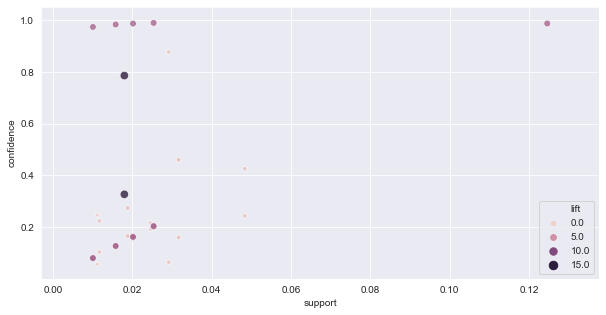

In [249]:
support = rules.support
confidence = rules.confidence
lift = rules.lift
ruletext = rules.antecedents.astype(str) +' => ' + rules.consequents.astype(str)

#plt.figure(figsize=(10,5))
#sns.scatterplot('support','confidence', hue='lift', size='lift', alpha=.8, data=rules)
#sns.set_style('darkgrid')
#plt.show()

In [272]:
fig = go.Figure(data=go.Scatter(x=support, y=confidence, mode='markers',
                                marker_color=lift,
                                marker_size=lift,
                                marker_colorscale='Viridis',
                                text=ruletext))
fig.update_layout(title='Support vs. Confidence with Lift')
fig.show()

In [179]:
import networkx as nx  
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    #strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    strs = [f'R{i}' for i in range (rules_to_show)]

    plt.figure(figsize=(12,12))

    for i in range (rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

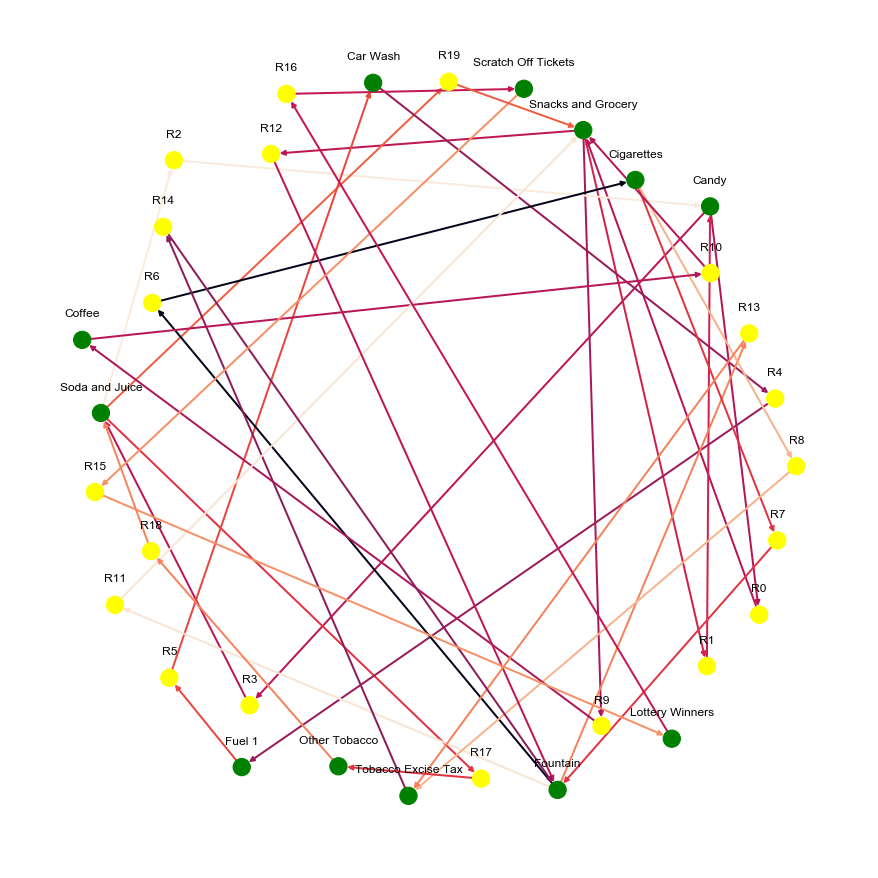

In [180]:
draw_graph(rules,20)

In [181]:
rules.head(rules.shape[0])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Candy),(Snacks and Grocery),0.068834,0.113630,0.018847,0.273810,2.409655,0.011026,1.220575
1,(Snacks and Grocery),(Candy),0.113630,0.068834,0.018847,0.165865,2.409655,0.011026,1.116326
2,(Soda and Juice),(Candy),0.198306,0.068834,0.031685,0.159780,2.321243,0.018035,1.108241
3,(Candy),(Soda and Juice),0.068834,0.198306,0.031685,0.460317,2.321243,0.018035,1.485491
4,(Car Wash),(Fuel 1),0.033324,0.454247,0.029227,0.877049,1.930774,0.014090,4.438787
5,(Fuel 1),(Car Wash),0.454247,0.033324,0.029227,0.064342,1.930774,0.014090,1.033150
6,(Fountain),(Cigarettes),0.127834,0.126195,0.020486,0.160256,1.269911,0.004354,1.040562
7,(Cigarettes),(Fountain),0.126195,0.127834,0.020486,0.162338,1.269911,0.004354,1.041191
8,(Cigarettes),(Tobacco Excise Tax),0.126195,0.124556,0.124556,0.987013,7.924242,0.108838,67.409178
10,(Snacks and Grocery),(Coffee),0.113630,0.052445,0.011745,0.103365,1.970941,0.005786,1.056791
